# Project 2 Team 7

### Diana Casanova, Renata Barreto, and Elizabeth Breen

## 1: Introduction
Which U.S. counties should we prioritize to receive a diabetes intervention? 

To answer this question, we will analyze the data provided using Machine Learning techniques. Theoretically, these techniques will allow us to not only identify places with the greatest current burden of diabetes, but also to predict where the burden of diabetes will be highest in the future. Places with the greatest burden of diabetes may benefit the most from the diabetes intervention considered by policy makers.

First, we import our libraries and data:


### Setup

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

In [2]:
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv') 

## 2: Exploratory Data Analysis

Next, we take stock of the data: What does it look like? What format is it in? How large is it? What kinds of information is provided?

In [3]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [4]:
diabetes.shape

(3220, 95)

In [5]:
diabetes.describe()

,CountyFIPS,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,31393.605280,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,840.862422,90.346894,36.718634,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,16292.078954,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,3534.196512,534.021931,300.672832,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,1001.000000,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,19032.500000,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,30.000000,0.000000,0.000000,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,30024.000000,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,114.000000,9.000000,0.000000,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,46105.500000,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,425.250000,48.000000,6.000000,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,72153.000000,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,82699.000000,14104.000000,10609.000000,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


In [6]:
diabetes.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                      object
Obesity_Number                                                                       object
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

### Data Preprocessing

In [7]:
diabetes.isnull().sum()

County                                                                              0
State                                                                               0
CountyFIPS                                                                          0
Diabetes_Number                                                                     0
Obesity_Number                                                                      0
                                                                                   ..
sex and age_total population_18 years and over_female                               0
sex and age_total population_18 years and over_sex ratio (males per 100 females)    0
sex and age_total population_65 years and over_1                                    0
sex and age_total population_65 years and over_male                                 0
sex and age_total population_65 years and over_female                               0
Length: 95, dtype: int64

In [8]:
# convert strings to numeric data types

diabetes = diabetes.apply(pd.to_numeric, errors = 'coerce')
diabetes.head()

#create proportions by sex
diabetes['male_over_18']=diabetes['sex and age_total population_18 years and over_male']/diabetes['sex and age_total population_18 years and over']
diabetes['female_over_18']=diabetes['sex and age_total population_18 years and over_female']/diabetes['sex and age_total population_18 years and over']

Remove the County and State names from the data

In [9]:
diabetes = diabetes.drop(['County', 'State'
                         ], axis = 1)
diabetes.head()

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,...,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18
0,1001,5178.0,13489.0,12525.0,76.5,55200,54170,1030,54170,42437,...,8050,41831,20054,21777,92.1,8050,3488,4562,0.479405,0.520595
1,1003,16707.0,48542.0,40024.0,86.6,208107,204535,3572,204535,179526,...,40665,162430,78104,84326,92.6,40665,18870,21795,0.480847,0.519153
2,1005,3400.0,8009.0,5431.0,76.2,25782,25429,353,25429,12216,...,4634,20346,10923,9423,115.9,4634,2004,2630,0.536862,0.463138
3,1007,2371.0,6534.0,5827.0,80.5,22527,22340,187,22340,17268,...,3661,17868,9578,8290,115.5,3661,1633,2028,0.536042,0.463958
4,1009,6282.0,14227.0,14365.0,79.7,57645,56710,935,56710,55054,...,10233,44177,21595,22582,95.6,10233,4540,5693,0.488829,0.511171


In [10]:
diabetes_nomiss=diabetes.dropna() 

In [11]:
diabetes_nomiss.shape

(3112, 95)

In [12]:
diabetes_rates = diabetes_nomiss.drop (["CountyFIPS", "race_total population"], axis = 1).div(diabetes_nomiss['race_total population'], axis = "index")
diabetes_rates['CountyFIPS'] = diabetes_nomiss['CountyFIPS']
diabetes_rates['race_total population'] = diabetes_nomiss['race_total population']


# reconstruct rates by sex

diabetes_rates['male_18_adj'] = diabetes_rates['male_over_18']*diabetes['race_total population']
diabetes_rates['female_18_adj'] = diabetes_rates['female_over_18']*diabetes['race_total population']

In [13]:
diabetes_rates.shape

(3112, 97)

In [14]:
diabetes_rates.head()

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18,CountyFIPS,race_total population,male_18_adj,female_18_adj
0,0.093804,0.244366,0.226902,0.001386,0.981341,0.018659,0.981341,0.768786,0.191395,0.002880,...,0.001668,0.145833,0.063188,0.082645,0.000009,0.000009,1001,55200,0.479405,0.520595
1,0.080281,0.233255,0.192324,0.000416,0.982836,0.017164,0.982836,0.862662,0.094970,0.007314,...,0.000445,0.195404,0.090675,0.104730,0.000002,0.000002,1003,208107,0.480847,0.519153
2,0.131875,0.310643,0.210651,0.002956,0.986308,0.013692,0.986308,0.473819,0.475758,0.002793,...,0.004495,0.179738,0.077729,0.102009,0.000021,0.000018,1005,25782,0.536862,0.463138
3,0.105251,0.290052,0.258667,0.003573,0.991699,0.008301,0.991699,0.766547,0.222755,0.000355,...,0.005127,0.162516,0.072491,0.090025,0.000024,0.000021,1007,22527,0.536042,0.463958
4,0.108977,0.246804,0.249198,0.001383,0.983780,0.016220,0.983780,0.955052,0.014954,0.002446,...,0.001658,0.177518,0.078758,0.098760,0.000008,0.000009,1009,57645,0.488829,0.511171


In [15]:
diabetes_rates.describe()

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18,CountyFIPS,race_total population,male_18_adj,female_18_adj
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,...,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000
mean,0.092857,0.251666,0.200861,0.008463,0.976059,0.023941,0.976059,0.831107,0.090215,0.019398,...,0.009663,0.183579,0.084032,0.099547,4.698359e-05,4.576699e-05,30374.235219,1.036826e+05,0.497027,0.502973
std,0.028097,0.044323,0.044511,0.022489,0.019379,0.019379,0.019379,0.167534,0.144287,0.076536,...,0.023179,0.045926,0.023584,0.023556,1.061852e-04,9.812855e-05,15162.736031,3.313625e+05,0.028644,0.028644
min,0.019038,0.088946,0.064949,0.000008,0.713126,0.000000,0.713126,0.038912,0.000000,0.000000,...,0.000009,0.037986,0.015325,0.022662,4.827863e-08,5.075037e-08,1001.000000,2.280000e+02,0.414418,0.194306
25%,0.072169,0.223436,0.170128,0.001186,0.971038,0.013370,0.971038,0.767171,0.006815,0.001722,...,0.001399,0.154466,0.069043,0.085041,7.144686e-06,7.439118e-06,18178.500000,1.122675e+04,0.482462,0.497618
50%,0.089291,0.252390,0.199036,0.003179,0.980119,0.019881,0.980119,0.896086,0.022927,0.003499,...,0.003741,0.180192,0.081007,0.098869,1.898416e-05,1.927036e-05,29174.000000,2.613750e+04,0.491329,0.508671
75%,0.110175,0.280113,0.231041,0.007626,0.986630,0.028962,0.986630,0.950193,0.101805,0.008392,...,0.009028,0.208009,0.095678,0.112504,4.459395e-05,4.440287e-05,45075.500000,6.847725e+04,0.502382,0.517538
max,0.224208,0.476788,0.392285,0.595175,1.000000,0.286874,1.000000,1.000000,0.874123,0.924799,...,0.525000,0.555963,0.268589,0.287374,2.389957e-03,1.996008e-03,56045.000000,1.009805e+07,0.805694,0.585582


In [16]:
diabetes_rates.dtypes

Diabetes_Number                                                                     float64
Obesity_Number                                                                      float64
Physical_Inactivity_Number                                                          float64
sex and age_total population_65 years and over_sex ratio (males per 100 females)    float64
race_total population_one race                                                      float64
                                                                                     ...   
female_over_18                                                                      float64
CountyFIPS                                                                            int64
race_total population                                                                 int64
male_18_adj                                                                         float64
female_18_adj                                                                   

### Visualization and Plotting

We created numerous plots to help us get a handle on the data, including histograms, box and whisker plots, and scatterplots. Because you asked us to limit ourselves to 3 for this final notebook, we are including the 3 plots that we thought were helpful to give us a grasp of the patterns between diabetes prevalence and race, age, and gender. 


### Proportion of Age Group in County vs Proportion of Diabetes in County 

True


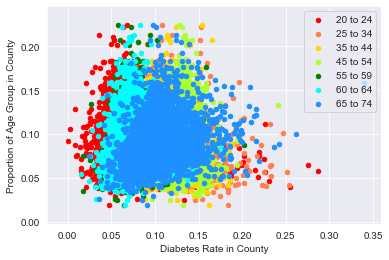

In [17]:

ax1 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_20 to 24 years', y='Diabetes_Number', color='r', label = "20 to 24")
ax2 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_25 to 34 years', y='Diabetes_Number', color='coral', label = "25 to 34", ax=ax1)
ax3 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_35 to 44 years', y='Diabetes_Number', color='gold', label = "35 to 44", ax=ax1)
ax4 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_45 to 54 years', y='Diabetes_Number', color='greenyellow', label = "45 to 54", ax=ax1)
ax5 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_55 to 59 years', y='Diabetes_Number', color='green', label = "55 to 59", ax=ax1)
ax6 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_60 to 64 years', y='Diabetes_Number', color='aqua', label = "60 to 64", ax=ax1)
ax7 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_65 to 74 years', y='Diabetes_Number', color='dodgerblue', label = "65 to 74", ax=ax1)

ax1.set_xlabel("Diabetes Rate in County")
ax1.set_ylabel("Proportion of Age Group in County")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)  # True

This plot seems to show that counties with a higher proportion of older people tend to have higher rates of diabetes. Note that the age structure of the population isn't controlled for here.

### Proportion of "Sex" in County vs Proportion of Diabetes in County 

True


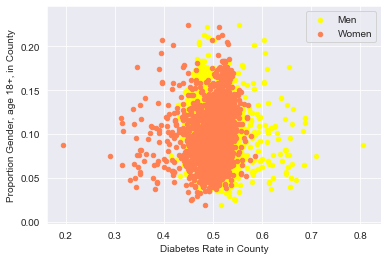

In [18]:
ax1 = diabetes_rates.plot(kind='scatter', y='Diabetes_Number', x='male_18_adj', color='yellow', label = "Men")
ax2 = diabetes_rates.plot(kind='scatter', y='Diabetes_Number', x='female_18_adj', color='coral', label = "Women", ax=ax1)


ax1.set_xlabel("Diabetes Rate in County")
ax1.set_ylabel("Proportion Gender, age 18+, in County")
print(ax1 == ax2 )  # True

### Proportion Race/Ethnic Group in County vs Proportion Diabetes in County 

True


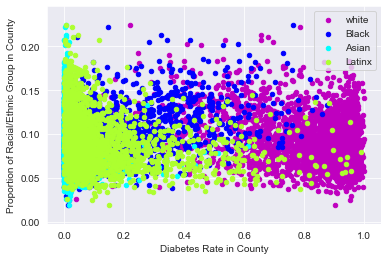

In [19]:
ax1 = diabetes_rates.plot(kind='scatter', x='race_total population_one race_white', y='Diabetes_Number', color='m', label = "white")
ax2 = diabetes_rates.plot(kind='scatter', x='race alone or in combination with one or more other races_total population_black or african american', y='Diabetes_Number', color='blue', label = "Black", ax=ax1)
ax3 = diabetes_rates.plot(kind='scatter', x='race alone or in combination with one or more other races_total population_asian', y='Diabetes_Number', color='cyan', label = "Asian", ax=ax1)
ax4 = diabetes_rates.plot(kind='scatter', x='hispanic or latino and race_total population_hispanic or latino (of any race)', y='Diabetes_Number', color='greenyellow', label = "Latinx", ax=ax1)

ax1.set_xlabel("Diabetes Rate in County")
ax1.set_ylabel("Proportion of Racial/Ethnic Group in County")
print(ax1 == ax2 == ax3 == ax4)  # True

## Covariance and Correlation

Because we ran out of plots to show you, we'd also like to show you how the features in the provided data are correlated. For instance, you'll see that inactivity, obesity, and diabetes are each correlated. 

In [20]:
diabetes_rates.cov(min_periods=1)

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18,CountyFIPS,race_total population,male_18_adj,female_18_adj
Diabetes_Number,7.894587e-04,6.844165e-04,7.392737e-04,-0.000028,5.848109e-05,-5.848109e-05,5.848109e-05,-0.001086,0.001498,1.816136e-05,...,-0.000027,0.000296,1.207522e-04,1.747535e-04,-1.489305e-07,-1.561777e-07,-1.663693e+01,-1.440395e+03,-6.470222e-05,6.470222e-05
Obesity_Number,6.844165e-04,1.964511e-03,1.142120e-03,-0.000095,8.406574e-05,-8.406574e-05,8.406574e-05,-0.001323,0.002029,5.637231e-05,...,-0.000097,0.000113,2.752507e-05,8.515646e-05,-5.281766e-07,-5.786064e-07,-7.564394e+00,-2.927693e+03,1.345118e-05,-1.345118e-05
Physical_Inactivity_Number,7.392737e-04,1.142120e-03,1.981217e-03,0.000024,1.257372e-04,-1.257372e-04,1.257372e-04,-0.000824,0.001846,-1.777244e-04,...,0.000029,0.000482,2.030408e-04,2.793159e-04,9.302973e-08,3.963252e-08,-8.494275e+01,-3.085954e+03,-3.285167e-06,3.285167e-06
sex and age_total population_65 years and over_sex ratio (males per 100 females),-2.835695e-05,-9.512606e-05,2.350292e-05,0.000506,1.273927e-05,-1.273927e-05,1.273927e-05,0.000353,-0.000374,1.074261e-04,...,0.000505,0.000240,1.586746e-04,8.103114e-05,2.300754e-06,2.033852e-06,6.086437e+00,-7.934399e+02,1.170445e-04,-1.170445e-04
race_total population_one race,5.848109e-05,8.406574e-05,1.257372e-04,0.000013,3.755635e-04,-3.755635e-04,3.755635e-04,0.000783,0.000280,-3.555640e-04,...,0.000019,0.000153,6.355344e-05,8.933086e-05,1.135170e-07,1.381163e-07,2.844587e-02,-8.704795e+02,-3.073089e-05,3.073089e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
female_over_18,-1.561777e-07,-5.786064e-07,3.963252e-08,0.000002,1.381163e-07,-1.381163e-07,1.381163e-07,0.000002,-0.000002,4.355835e-07,...,0.000002,0.000001,7.022972e-07,5.557732e-07,1.020195e-08,9.629212e-09,4.309822e-02,-4.243632e+00,3.003803e-07,-3.003803e-07
CountyFIPS,-1.663693e+01,-7.564394e+00,-8.494275e+01,6.086437,2.844587e-02,-2.844587e-02,2.844587e-02,313.502789,-281.325010,-1.415042e+01,...,8.642255,32.927748,1.752275e+01,1.540500e+01,4.225771e-02,4.309822e-02,2.299086e+08,-2.806758e+08,-4.936816e-01,4.936816e-01
race_total population,-1.440395e+03,-2.927693e+03,-3.085954e+03,-793.439867,-8.704795e+02,8.704795e+02,-8.704795e+02,-10752.608968,3783.620609,-1.147206e+03,...,-902.587392,-3226.821305,-1.720473e+03,-1.506348e+03,-4.375760e+00,-4.243632e+00,-2.806758e+08,1.098011e+11,-1.054610e+03,1.054610e+03
male_18_adj,-6.470222e-05,1.345118e-05,-3.285167e-06,0.000117,-3.073089e-05,3.073089e-05,-3.073089e-05,0.000244,-0.000504,1.715344e-04,...,0.000162,-0.000097,1.646465e-05,-1.139025e-04,5.839126e-07,3.003803e-07,-4.936816e-01,-1.054610e+03,8.205001e-04,-8.205001e-04


In [21]:
diabetes_rates.corr(method='pearson', min_periods=1)

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18,CountyFIPS,race_total population,male_18_adj,female_18_adj
Diabetes_Number,1.000000,0.549577,0.591118,-0.044877,0.107401,-0.107401,0.107401,-0.230673,0.369464,0.008445,...,-0.042219,0.229002,0.182226,0.264039,-0.049918,-0.056645,-0.039051,-0.154708,-0.080392,0.080392
Obesity_Number,0.549577,1.000000,0.578920,-0.095433,0.097870,-0.097870,0.097870,-0.178148,0.317216,0.016618,...,-0.094503,0.055356,0.026332,0.081564,-0.112225,-0.133033,-0.011256,-0.199340,0.010595,-0.010595
Physical_Inactivity_Number,0.591118,0.578920,1.000000,0.023479,0.145766,-0.145766,0.145766,-0.110549,0.287397,-0.052170,...,0.028347,0.235961,0.193418,0.266401,0.019683,0.009074,-0.125859,-0.209228,-0.002577,0.002577
sex and age_total population_65 years and over_sex ratio (males per 100 females),-0.044877,-0.095433,0.023479,1.000000,0.029230,-0.029230,0.029230,0.093666,-0.115214,0.062413,...,0.968349,0.232083,0.299167,0.152963,0.963458,0.921617,0.017849,-0.106472,0.181693,-0.181693
race_total population_one race,0.107401,0.097870,0.145766,0.029230,1.000000,-1.000000,1.000000,0.241059,0.100154,-0.239725,...,0.043077,0.171775,0.139052,0.195689,0.055164,0.072629,0.000097,-0.135554,-0.055360,0.055360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
female_over_18,-0.056645,-0.133033,0.009074,0.921617,0.072629,-0.072629,0.072629,0.112788,-0.123317,0.057998,...,0.941333,0.279157,0.303463,0.240441,0.979093,1.000000,0.028966,-0.130509,0.106865,-0.106865
CountyFIPS,-0.039051,-0.011256,-0.125859,0.017849,0.000097,-0.000097,0.000097,0.123413,-0.128589,-0.012194,...,0.024590,0.047285,0.049001,0.043131,0.026246,0.028966,1.000000,-0.055863,-0.001137,0.001137
race_total population,-0.154708,-0.199340,-0.209228,-0.106472,-0.135554,0.135554,-0.135554,-0.193690,0.079136,-0.045235,...,-0.117516,-0.212036,-0.220153,-0.192987,-0.124362,-0.130509,-0.055863,1.000000,-0.111109,0.111109
male_18_adj,-0.080392,0.010595,-0.002577,0.181693,-0.055360,0.055360,-0.055360,0.050818,-0.121897,0.078244,...,0.244367,-0.074067,0.024372,-0.168811,0.191975,0.106865,-0.001137,-0.111109,1.000000,-1.000000


In [22]:
diabetes_rates.shape

(3112, 97)

## 3: Prepare to Fit Model

### 3.1: Data Cleaning

Since we've dealt with a large portion of the data cleaning in the earlier 'Data Preprocessing' section, our data set is currently structured for a quantitative outcome (e.g., continuous variable). However, we are also interested in testing machine learning algorithms that predict qualitative outcomes. In this next step, we'll use the continous variable 'diabetes_rates' and create a binary variable where a value of 1 designates that the county's diabetes rates fall within the top quartile and 0 designates that the county's diabetes rates do not fall with the top quartile. 

In [23]:
diabetes_rates['diabetes_top25'] = np.where(diabetes_rates['Diabetes_Number'] > np.nanquantile(diabetes_rates['Diabetes_Number'], q=0.75), 1, 0)
diabetes_rates.head()


,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18,CountyFIPS,race_total population,male_18_adj,female_18_adj,diabetes_top25
0,0.093804,0.244366,0.226902,0.001386,0.981341,0.018659,0.981341,0.768786,0.191395,0.002880,...,0.145833,0.063188,0.082645,0.000009,0.000009,1001,55200,0.479405,0.520595,0
1,0.080281,0.233255,0.192324,0.000416,0.982836,0.017164,0.982836,0.862662,0.094970,0.007314,...,0.195404,0.090675,0.104730,0.000002,0.000002,1003,208107,0.480847,0.519153,0
2,0.131875,0.310643,0.210651,0.002956,0.986308,0.013692,0.986308,0.473819,0.475758,0.002793,...,0.179738,0.077729,0.102009,0.000021,0.000018,1005,25782,0.536862,0.463138,1
3,0.105251,0.290052,0.258667,0.003573,0.991699,0.008301,0.991699,0.766547,0.222755,0.000355,...,0.162516,0.072491,0.090025,0.000024,0.000021,1007,22527,0.536042,0.463958,0
4,0.108977,0.246804,0.249198,0.001383,0.983780,0.016220,0.983780,0.955052,0.014954,0.002446,...,0.177518,0.078758,0.098760,0.000008,0.000009,1009,57645,0.488829,0.511171,0


In [24]:
diabetes_top25 = diabetes_rates
diabetes_top25.head()

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18,CountyFIPS,race_total population,male_18_adj,female_18_adj,diabetes_top25
0,0.093804,0.244366,0.226902,0.001386,0.981341,0.018659,0.981341,0.768786,0.191395,0.002880,...,0.145833,0.063188,0.082645,0.000009,0.000009,1001,55200,0.479405,0.520595,0
1,0.080281,0.233255,0.192324,0.000416,0.982836,0.017164,0.982836,0.862662,0.094970,0.007314,...,0.195404,0.090675,0.104730,0.000002,0.000002,1003,208107,0.480847,0.519153,0
2,0.131875,0.310643,0.210651,0.002956,0.986308,0.013692,0.986308,0.473819,0.475758,0.002793,...,0.179738,0.077729,0.102009,0.000021,0.000018,1005,25782,0.536862,0.463138,1
3,0.105251,0.290052,0.258667,0.003573,0.991699,0.008301,0.991699,0.766547,0.222755,0.000355,...,0.162516,0.072491,0.090025,0.000024,0.000021,1007,22527,0.536042,0.463958,0
4,0.108977,0.246804,0.249198,0.001383,0.983780,0.016220,0.983780,0.955052,0.014954,0.002446,...,0.177518,0.078758,0.098760,0.000008,0.000009,1009,57645,0.488829,0.511171,0


### 3.2: Partition Data

#### Train/Test/Validation Split

In [25]:
#For quantitative outcome
X = diabetes_rates.drop(['Diabetes_Number', 'diabetes_top25'], axis = 1)
y = diabetes_rates['Diabetes_Number']
X.head()
X.dtypes

Obesity_Number                                                                      float64
Physical_Inactivity_Number                                                          float64
sex and age_total population_65 years and over_sex ratio (males per 100 females)    float64
race_total population_one race                                                      float64
race_total population_two or more races                                             float64
                                                                                     ...   
female_over_18                                                                      float64
CountyFIPS                                                                            int64
race_total population                                                                 int64
male_18_adj                                                                         float64
female_18_adj                                                                   

In [26]:
from sklearn.model_selection import train_test_split 

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)

In [27]:
#For qualitative outcome
Xclass = diabetes_top25.drop(['Diabetes_Number', 'diabetes_top25', 'CountyFIPS', 'race_total population'], axis = 1)
yclass= diabetes_top25['diabetes_top25']
Xclass.head()

,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,...,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18,male_18_adj,female_18_adj
0,0.244366,0.226902,0.001386,0.981341,0.018659,0.981341,0.768786,0.191395,0.002880,0.001486,...,0.363297,0.394511,0.001668,0.145833,0.063188,0.082645,0.000009,0.000009,0.479405,0.520595
1,0.233255,0.192324,0.000416,0.982836,0.017164,0.982836,0.862662,0.094970,0.007314,0.001369,...,0.375307,0.405205,0.000445,0.195404,0.090675,0.104730,0.000002,0.000002,0.480847,0.519153
2,0.310643,0.210651,0.002956,0.986308,0.013692,0.986308,0.473819,0.475758,0.002793,0.001008,...,0.423668,0.365488,0.004495,0.179738,0.077729,0.102009,0.000021,0.000018,0.536862,0.463138
3,0.290052,0.258667,0.003573,0.991699,0.008301,0.991699,0.766547,0.222755,0.000355,0.000000,...,0.425179,0.368003,0.005127,0.162516,0.072491,0.090025,0.000024,0.000021,0.536042,0.463958
4,0.246804,0.249198,0.001383,0.983780,0.016220,0.983780,0.955052,0.014954,0.002446,0.000347,...,0.374621,0.391743,0.001658,0.177518,0.078758,0.098760,0.000008,0.000009,0.488829,0.511171


In [28]:
from sklearn.model_selection import train_test_split 

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

Xclass_train, Xclass_test, yclass_train, yclass_test = train_test_split(Xclass, yclass,
                                                    train_size=0.80, test_size=0.20)

In [29]:
print("Dimensions of Diabetes Rates Dataframe are", X.shape)
print("Dimensions of Classification Dataframe are", Xclass.shape)

Dimensions of Diabetes Rates Dataframe are (3112, 96)
Dimensions of Classification Dataframe are (3112, 94)


#### Validation Set

In [30]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [31]:
print("Shape of X_train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X_train is (1866, 96)
Shape of y_train is (1866,)
Shape of X_test is (623, 96)
Shape of y_test is (623,)


In [32]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

Xclass_train, Xclass_validate, yclass_train, yclass_validate = train_test_split(Xclass_train, yclass_train,
                                                    train_size=0.75, test_size=0.25)

In [33]:
print("Shape of X_train is", Xclass_train.shape)
print("Shape of y_train is", yclass_train.shape)
print("Shape of X_test is", Xclass_test.shape)
print("Shape of y_test is", yclass_test.shape)

Shape of X_train is (1866, 94)
Shape of y_train is (1866,)
Shape of X_test is (623, 94)
Shape of y_test is (623,)


### 3.3: Feature Selection

In [34]:
print(X_train.columns)

Index(['Obesity_Number', 'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_1',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
       'race_total population_one race_american indian and alaska native_navajo tribal grouping',
       'race_total population_one race_american indian and alaska native_sioux tribal grouping',
       'race_total population_one race_asian',
       'race_total population_one race_asian_asian indian',
       'race_total population

In [35]:
cor_matrix = X_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
X_train.drop(to_drop, axis=1, inplace=True)

In [36]:
X_validate.drop(to_drop, axis=1, inplace=True)

In [37]:
X_test.drop(to_drop, axis=1, inplace=True)

C:\Users\diana\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
cor_matrix = Xclass_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
Xclass_train.drop(to_drop, axis=1, inplace=True)

In [39]:
Xclass_validate.drop(to_drop, axis=1, inplace=True)

In [40]:
Xclass_test.drop(to_drop, axis=1, inplace=True)

## 4: Train Models

### 4.1: Model Description

Choose 5 different machine learning techniques. See available ones in the
scikit-learn documentation. Detail the basic logic and assumptions underlying each model, its pros/cons,and why it is a plausible choice for this problem.


**1. Linear Regression**
Linear regression assumes that the underlying relationship between the independent and dependent variables is a linear one, that the data are normally distributed, that there is little to no multicollinearity, and that the variables have a similar variance. Linear regression is often useful to researchers, even though it's rare that all of the underlying assumptions are met, because it gives us a baseline idea about the strength and direction of the relationship. The downside is that if the underlying relationship is not linear, we risk misspecification bias. Because diabetes prevalence likely varies with other characteristics, linear regression is a useful first step for this project.

**2. Ridge Regression**
Ridge Regression is a regularizing technique used to reduce the coefficients of features in our model, in order to avoid overfitting. Ridge regression assumes independence, linearity, and constant variance. It is useful for this problem because it will help us to reduce overfitting and see which variables could be removed from our model.

**3. LASSO Regression**
LASSO is another regularizing technique to reduce the number of features in our model. Like Ridge regression, it uses a tuning parameter to penalize features with small coeficients. LASSO shrinks those coefficients to zero. It is useful for this problem because it will help us to reduce overfitting, creating a better model for prediction. 4. 5.

**4. Logistic Regression**

**5. Support Vector Machine**


### 4.2 Train Models

#### 1. Ordinary Least Squares Regression

In [41]:
lin_reg = LinearRegression(normalize=True)
lin_model = lin_reg.fit(X_train, y_train)

#### 2. Ridge Regression

In [42]:
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']

#### 3. LASSO Regression

In [43]:
lasso_reg = Lasso(max_iter=10000) 
lasso_model = lasso_reg.fit(X_train, y_train) 
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']

#### 4. Logistic Regression

In [44]:
log_reg = LogisticRegression()

log_model = log_reg.fit(Xclass_train, yclass_train)

#### 5. Support Vector Machines

In [45]:
svm = SVC()
svm_model = svm.fit(Xclass_train, yclass_train)

## 5: Validate and Refine Model

### 5.1: Predict on the Validation Set

#### 1. Ordinary Least Squares Regression

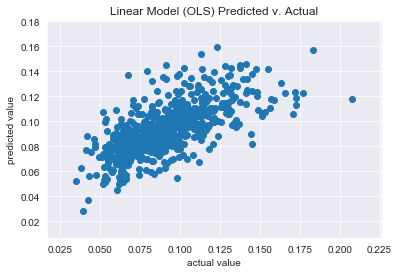

In [46]:
lin_pred = lin_model.predict(X_validate)

plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [47]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [48]:
rmse(lin_pred, y_validate)

0.019490468174985398

In [49]:
param_grid = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False']}

lin_grid_reg = GridSearchCV(lin_reg, param_grid, cv=3, iid=False)
lin_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)

print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

{'fit_intercept': 'True', 'normalize': 'True'}
Best CV R^2: 0.47697488623626394
Validation R^2: 0.439161357724859
Validation RMSE 0.019490468174985398


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


#### 2. Ridge Regression

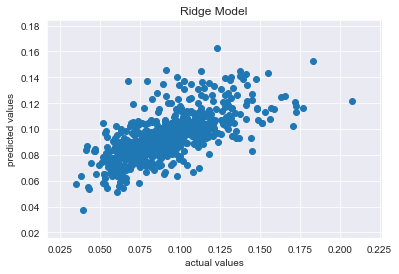

In [50]:
ridge_pred = ridge_model.predict(X_validate)

plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [51]:
rmse(ridge_pred, y_validate)

0.019419034600260624

In [52]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'auto'}
Best CV R^2: 0.4966033312931822
Validation R^2: 0.44827307731911437
Validation RMSE 0.019331492934958328


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


#### 3. LASSO Regression

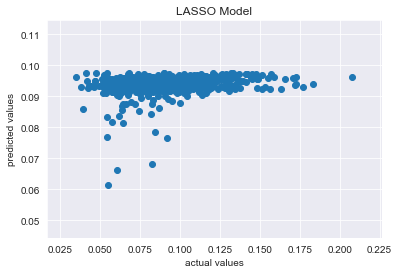

In [53]:
lasso_pred = lasso_model.predict(X_validate)

plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [54]:
rmse(lasso_pred, y_validate)

0.025685092187402704

In [55]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: -0.0004088592818273599
Validation R^2: -0.006165678756800741
Validation RMSE 0.026105863098580435


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


#### 4. Logistic Regression

In [56]:
y_pred = log_model.predict(Xclass_validate)

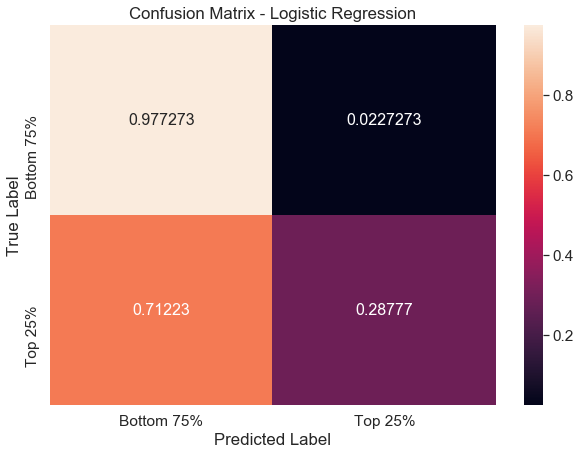

In [57]:
import seaborn as sns

cf_matrix = confusion_matrix(yclass_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Bottom 75%", 1: "Top 25%"})
df_cm.index = ["Bottom 75%", "Top 25%"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [58]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

param_grid = {'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear','sag', 'saga']}

log_grid_reg = GridSearchCV(log_reg, param_grid, cv=3, iid=False)
log_grid_reg.fit(Xclass_train, yclass_train)

best_index = np.argmax(log_grid_reg.cv_results_["mean_test_score"])
best_log_pred = log_grid_reg.best_estimator_.predict(Xclass_validate)

print(log_grid_reg.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_log_pred, yclass_validate))
print('Best CV R^2:', max(log_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', log_grid_reg.score(Xclass_validate, yclass_validate))
print('Validation RMSE', rmse(best_log_pred, yclass_validate))


{'C': 0.1, 'fit_intercept': 'True', 'solver': 'sag'}
Validation Accuracy 0.8250401284109149
Best CV R^2: 0.7802786709539121
Validation R^2: 0.8250401284109149
Validation RMSE 0.41828204789242995


#### 5. Support Vector Machines

In [59]:
y_pred = svm_model.predict(Xclass_validate)

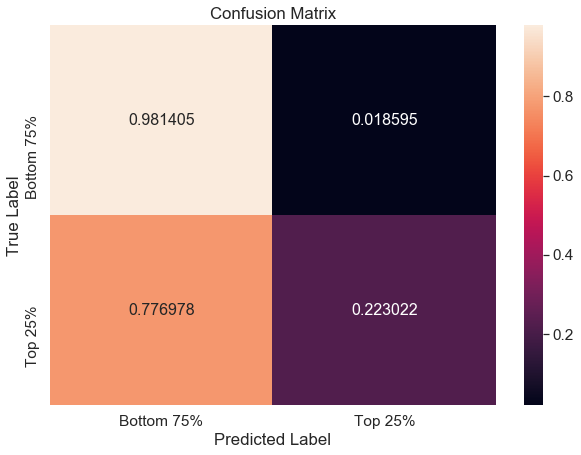

In [60]:
cf_matrix = confusion_matrix(yclass_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Bottom 75%", 1: "Top 25%"})
df_cm.index = ["Bottom 75%", "Top 25%"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
param_grid = {'C': np.arange(.1, 1, .1),
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False],
             'decision_function_shape': ['ovo', 'ovr']}

svm_grid_reg = GridSearchCV(svm_model, param_grid, cv=3, iid=False)
svm_grid_reg.fit(Xclass_train, yclass_train)

best_index = np.argmax(svm_grid_reg.cv_results_["mean_test_score"])
best_svm_pred = svm_grid_reg.best_estimator_.predict(Xclass_validate)

print(svm_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(svm_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', svm_grid_reg.score(Xclass_validate, yclass_validate))
print('Validation RMSE', rmse(best_svm_pred, yclass_validate))

{'C': 0.8, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}
Best CV R^2: 0.780278670953912
Validation R^2: 0.8170144462279294
Validation RMSE 0.4277681074742139


### 5.3: Test Set

In [62]:
X_test.shape

(623, 62)

#### Quantitative Outcome

In [63]:
best_pred = ridge_grid_reg.best_estimator_.predict(X_test)
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', ridge_grid_reg.score(X_test, y_test))
print('Test RMSE', rmse(best_pred, y_test))

Best CV R^2: 0.4966033312931822
Test R^2: 0.4599775426863081
Test RMSE 0.02025356657570571


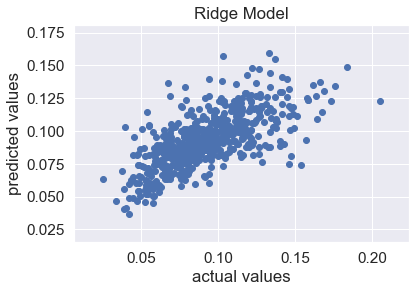

In [64]:
plt.scatter(y_test, best_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

#### Qualitatitive Outcome

In [65]:
best_log_pred = log_grid_reg.best_estimator_.predict(Xclass_test)
print('Validation Accuracy', accuracy_score(best_log_pred, yclass_test))
print('Best CV R^2:', max(log_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', log_grid_reg.score(Xclass_test, yclass_test))
print('Validation RMSE', rmse(best_log_pred, yclass_test))

Validation Accuracy 0.7929373996789727
Best CV R^2: 0.7802786709539121
Validation R^2: 0.7929373996789727
Validation RMSE 0.45504131715815355


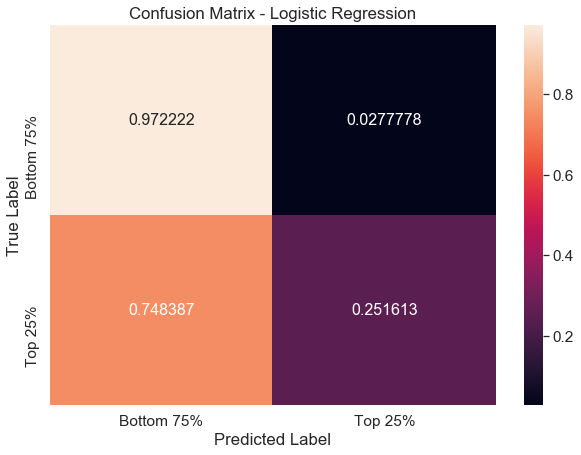

In [66]:
import seaborn as sns

cf_matrix = confusion_matrix(yclass_test, best_log_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Bottom 75%", 1: "Top 25%"})
df_cm.index = ["Bottom 75%", "Top 25%"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 5.4: Implement a Cross-Validation Approach

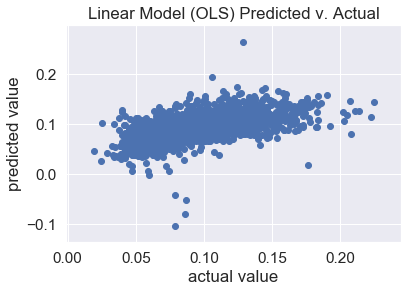

0.022948143829006888

In [67]:
from sklearn.model_selection import cross_val_predict

y = diabetes_rates['Diabetes_Number']
X = diabetes_rates.drop(['Diabetes_Number', 'diabetes_top25'], axis = 1)

lin_pred = cross_val_predict(lin_reg, X, y, cv=5)

plt.scatter(y, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()   

rmse(lin_pred, y)

#### Qualitative Outcome

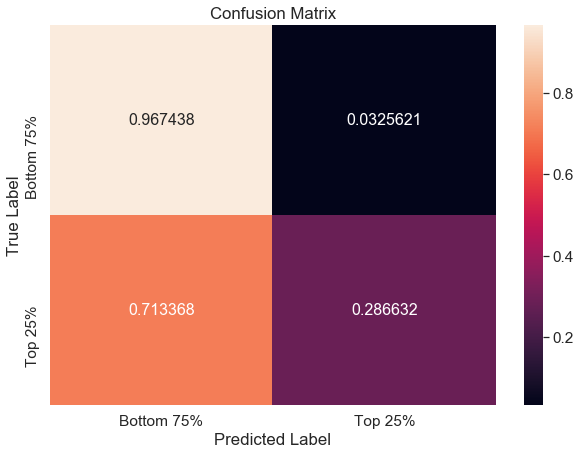

In [68]:
yclass= diabetes_top25['diabetes_top25']
Xclass = diabetes_top25.drop(['Diabetes_Number', 'diabetes_top25', 'CountyFIPS', 'race_total population'], axis = 1)

log_pred = cross_val_predict(log_reg, Xclass, yclass, cv=5)

cf_matrix = confusion_matrix(yclass, log_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
              range(2))

df_cm = df_cm.rename(index=str, columns={0: "Bottom 75%", 1: "Top 25%"})
df_cm.index = ["Bottom 75%", "Top 25%"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 6: Discussion Questions

Policymakers, you included a few trenchant questions in your instructions, which we answer below:

#### What is bias-variance tradeoff. Why is it relevant to machine learning problems like this one?

The bias-variance tradeoff refers to a difficulty we face in building statistical models. When models are made to fit very closely to the data, often using a lot of different features or variables in the process, this introduces a lot of variance, or flexibility of fit. The upside of high dimensionality models is that they are very accurate to the training data and they have little bias.  But because of their flexibility, high dimensionality models risk measuring noise in the data and mistaking it for signal. This problem is referred to as overfitting. 

Models with lower dimensionality tend to be less accurate and more rigid, or biased. Low dimension models are likelier than high dimension models to underfit data. When choosing an appropriate machine learning model, we must strike a balance between a model that is too biased/rigid and a model that is too noisy/flexible. This is the bias-variance tradeoff.

In traditional regression applications, scientists are often most interested in accurately and unbiasedly capturing any existing relationship in their data. But in machine learning, we are looking to predict future values of our outcome based on the body of data we’ve amassed. A model that hews too closely to the data on which it was trained is less likely to make accurate predictions. In machine learning, therefore, it’s vital that we strike the right balance between capturing variance and avoiding overfitting. 


#### Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting occurs when a model is so precisely matched to the training dataset that the model perceives variance in the sample as part of the underlying relationship between the independent and dependent variables. Overfitting is particularly problematic for machine learning applications, because a model that has been overfit (overfitted?) will try to predict future values of the dependent variable that match with the variance or noise in the training data. This means that overfit models will be less successful at prediction, and prediction is the whole point of machine learning. 

We can address overfitting through the use of regularizing techniques like Ridge regression and LASSO. These help us to avoid overfitting by shrinking or eliminating coefficients in our model with low values. This reduces the overall number of dimensions in the model, pushing the balance away from overfitting.

#### Discuss your Analysis in 2-3 Paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as the race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application, why or why not?




A few caveats: Our predictions are made based on known (diagnosed) diabetes cases. However, in the United States today, many people are unable to access adequate medical care, including diabetes diagnosis and treatment. If diabetes is more common among populations with lesser access to medical care, this gives us greater reason to believe our measurement of diabetes prevalence is flawed.

The data provided do not tell us the demographics (age, gender, race, education, etc.) of the people who have been diagnosed with diabetes. This means that rather than directly capturing that, for instance, it is Asian women over age 70 with the highest prevalence of diabetes, we could only see that counties with a higher proportion of Asian women over age 70 also have a higher proportion of diabetes cases. We recommend analysis with data at a more granular level before spending billions of taxpayer dollars.
